In [1]:
from kneed import DataGenerator, KneeLocator
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os
import scipy.io
import json
import numpy as np
from format_data import *
from utils import *
import pickle
from delta_frequency import *

In [2]:
t_pre = 0.2#0.2
t_post = 0.50#0.300
bin_width = 0.005
# Créer les bins de temps"
psth_bins = np.arange(-t_pre, t_post, bin_width)
#gc = np.arange(0, 32)

In [3]:
path = '/auto/data2/eTheremin/ALTAI/ALTAI_20240822_SESSION_00/'

In [178]:

t_pre = 0.2#0.2
t_post = 0.30#0.300
bin_width = 0.005
# Créer les bins de temps"
psth_bins = np.arange(-t_pre, t_post, bin_width)

data = np.load(path+'headstage_0/data_0.005.npy', allow_pickle=True)
features = np.load(path+'headstage_0/features_0.005.npy', allow_pickle=True)
gc = np.load(path+'headstage_0/good_clusters.npy', allow_pickle=True)
bd = np.load(path + 'heatmap_bandwidth.npy', allow_pickle = True)

In [167]:
tracking = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tracking')
tones = get_played_frequency(features, t_pre, t_post, bin_width, 'tracking')

In [5]:
psth, delta_f = get_delta_f(data, features, t_pre, t_post, bin_width, gc)

/home/felicie/Desktop/Analyse/analysebingobike/delta_frequency.py:101: RuntimeWarning: divide by zero encountered in scalar divide
  diff = math.log2(features[bin]['Played_frequency']/features[bin]['Mock_frequency'])


[-3  0  3  6]


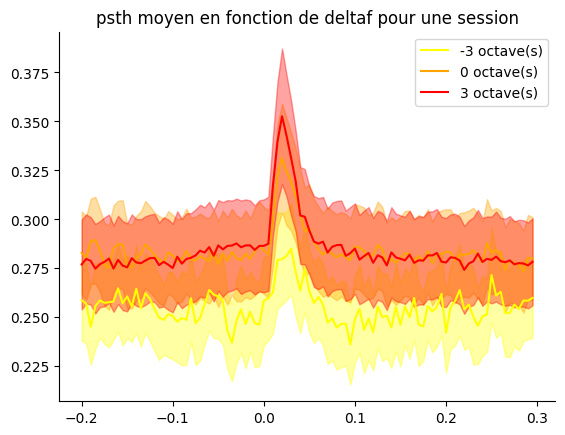

In [7]:
plot_psth_function_of_deltaf(psth, delta_f, 3, gc, psth_bins)

In [8]:
tracking = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tracking')
playback = get_psth(data, features, t_pre, t_post, bin_width, gc, 'playback')

In [9]:
m_tracking = np.nanmean(tracking, axis=1)
mm_tracking = np.nanmean(m_tracking, axis = 0)
m_playback = np.nanmean(playback, axis=1)
mm_playback = np.nanmean(m_playback, axis = 0)

[-3  1  5]


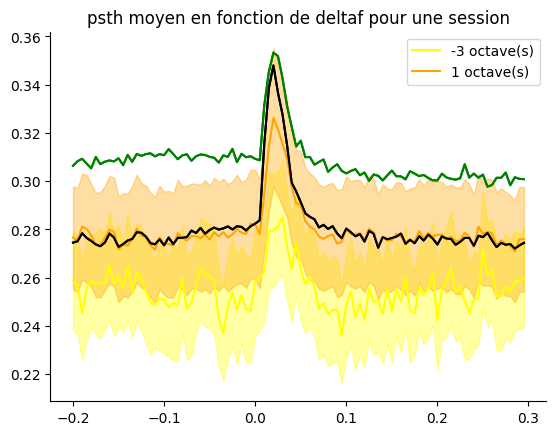

In [10]:
average, intervals = deltaf_for_cluster(psth, delta_f, 4, gc)
for interval in range(len(average[0])-1):
    psth_interval = [ligne[interval] for ligne in average]
    sem_interval = get_sem(np.array(psth_interval))
        
    average_interval = np.nanmean(psth_interval, axis=0)

        

    plt.plot(psth_bins, average_interval, label = f'{intervals[interval]} octave(s)', c = colors[interval])
    plt.plot(psth_bins, mm_tracking, c = 'green')
    plt.plot(psth_bins, mm_playback, c = 'black')
    plt.fill_between(psth_bins, np.array(average_interval) - np.array(sem_interval), np.array(average_interval) + np.array(sem_interval), alpha=0.2, color = colors[interval])
    plt.fill_between(psth_bins, np.array(average_interval) - np.array(sem_interval), np.array(average_interval) + np.array(sem_interval), alpha=0.2, color = colors[interval])
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.legend()
    plt.title('psth moyen en fonction de deltaf pour une session')
    

In [14]:
matching_triggers = match_triggers(features)

In [179]:
delta_f, tracking, playback, tones = [], [], [], []
for block in range(1,7):
    delta_f_block = []
    idx_tracking = matching_triggers[block]['idx_tracking']
    idx_playback = matching_triggers[block]['idx_playback']
    for idx in idx_playback:
        delta_f_block.append(math.log2(features[idx]['Played_frequency']/features[idx]['Mock_frequency']))
    delta_f_block = [0 if np.isinf(x) else x for x in delta_f_block]
    delta_f.append(delta_f_block)


    # je calcule les tracking correspondants poura voir les mêmes indices
    block_playback, block_tracking = [], []
    for c, cluster in enumerate(gc):
        bandwidth = bd[c]
        block_tones = []
        psth_clus_tr, psth_clus_pb = [], []
        for bin in idx_tracking:
            if bin-int(t_pre/bin_width)>0 and bin+int(t_post/bin_width)<len(features):
                    if features[bin]['Frequency_changes']>0 and features[bin]['Condition']==0 :
                        psth_clus_tr.append(data[c][bin-int(t_pre/bin_width):bin+int(t_post/bin_width)])
                        block_tones.append(features[bin]['Played_frequency'])
        block_tracking.append(psth_clus_tr)

        for bin in idx_playback:
            if bin-int(t_pre/bin_width)>0 and bin+int(t_post/bin_width)<len(features):
                    if features[bin]['Frequency_changes']>0 and features[bin]['Condition']==1 :
                        psth_clus_pb.append(data[c][bin-int(t_pre/bin_width):bin+int(t_post/bin_width)])
        block_playback.append(psth_clus_pb)
    tracking.append(block_tracking)
    playback.append(block_playback)
    tones.append(block_tones)




/tmp/ipykernel_130673/3091347508.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  delta_f_block.append(math.log2(features[idx]['Played_frequency']/features[idx]['Mock_frequency']))


In [180]:
tones

[[3601.0,
  4172.0,
  3601.0,
  4172.0,
  3601.0,
  4172.0,
  3601.0,
  4172.0,
  3601.0,
  4172.0,
  3601.0,
  4172.0,
  5598.0,
  6484.0,
  5598.0,
  6484.0,
  5598.0,
  4832.0,
  4172.0,
  3601.0,
  3109.0,
  2684.0,
  2317.0,
  2000.0,
  2317.0,
  2684.0,
  3109.0,
  3601.0,
  4172.0,
  4832.0,
  5598.0,
  4832.0,
  5598.0,
  4832.0,
  4172.0,
  4832.0,
  5598.0,
  4832.0,
  5598.0,
  4832.0,
  5598.0,
  6484.0,
  5598.0,
  4832.0,
  5598.0,
  6484.0,
  5598.0,
  6484.0,
  5598.0,
  4832.0,
  5598.0,
  4832.0,
  5598.0,
  4832.0,
  4172.0,
  1287.0,
  1111.0,
  959.0,
  828.0,
  959.0,
  828.0,
  959.0,
  828.0,
  715.0,
  828.0,
  959.0,
  1111.0,
  1287.0,
  1490.0,
  1727.0,
  2317.0,
  2684.0,
  2317.0,
  2000.0,
  1727.0,
  1490.0,
  1727.0,
  1287.0,
  1490.0,
  1727.0,
  1287.0,
  1727.0,
  1490.0,
  1727.0,
  1490.0,
  1287.0,
  1490.0,
  1287.0,
  1490.0,
  1287.0,
  1490.0,
  1287.0,
  1490.0,
  1727.0,
  2000.0,
  2317.0,
  2684.0,
  3109.0,
  2684.0,
  2317.0,
  2000.0,

In [115]:
tracking_ = np.hstack(tracking)
playback_ = np.hstack(playback)
delta_f_ = np.hstack(delta_f)
tones_ = np.hstack(tones)
print(len(tracking_[0]), len(delta_f_), len(playback_[0]),len(tones_))
# ok cooooool! j'ai les psth en tracking, leur équivalent en playback et leur delta_f correspondant en playback

4596 4596 4596 4596


In [145]:
tracking_verif = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tracking')

In [155]:
len(tracking_[0])

4596

In [ ]:
# Séparer les valeurs basées sur delta_frequency_
for tone in unique_tones : 
    #tracking_sup_1 = tracking_[:, (delta_f_ > 0.8) & (tones_ == tone)]   # tracking_ pour delta_frequency > 1
    #tracking_inf_1 = tracking_[:, (delta_f_ <= 0.8) & (tones_ == tone)]  # tracking_ pour delta_frequency <= 1
    tones_sup_1 = tones_[delta_f_ > 0.5]
    tones_inf_1 = tones_[delta_f_ <= 0.5]
    #tracking_sup_1 = tracking_[12][(delta_f_ > 0.8)]  # tracking_ pour delta_frequency > 1
    #tracking_inf_1 = tracking_[12][(delta_f_ <= 0.8)]

    tracking_sup_1 = tracking_[12][(delta_f_ > 3) &(tones_>=2000) & (tones_< 8000)]  # tracking_ pour delta_frequency > 1
    tracking_inf_1 = tracking_[12][(deltsa_f_ <= 3) &(tones_>=2000) & (tones_< 8000)]


    plt.plot(np.nanmean(tracking_sup_1, axis = 0), c = 'red')
    plt.plot(np.nanmean(tracking_inf_1, axis = 0), c = 'orange')
    #plt.plot(np.nanmean(np.nanmean(tracking_sup_1, axis=1), axis = 0), c = 'red')
    #plt.plot(np.nanmean(np.nanmean(tracking_inf_1, axis=1), axis = 0), c = 'orange')
    #plt.plot(np.nanmean(np.nanmean(tracking_, axis=1), axis = 0), c = 'purple')
    plt.title(f'{tone} Hz')
    plt.show()

playback_sup_1 = playback_[:, delta_f_ > 1]  # playback_ pour delta_frequency > 1
playback_inf_1 = playback_[:, delta_f_ <= 1]  # playback_ pour delta_frequency <= 1


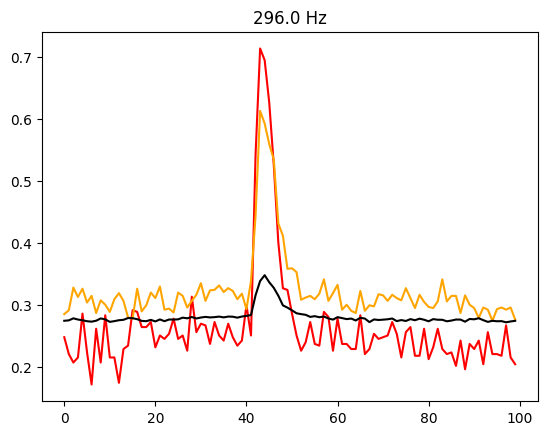

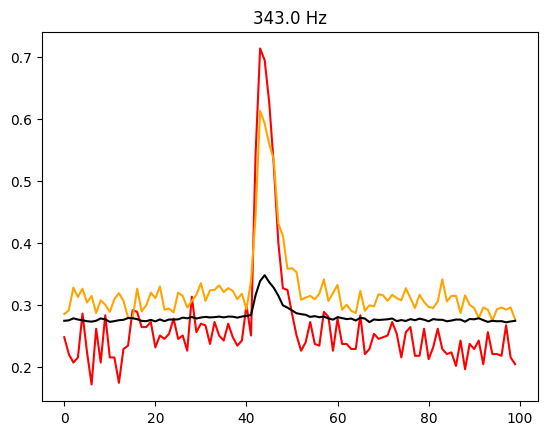

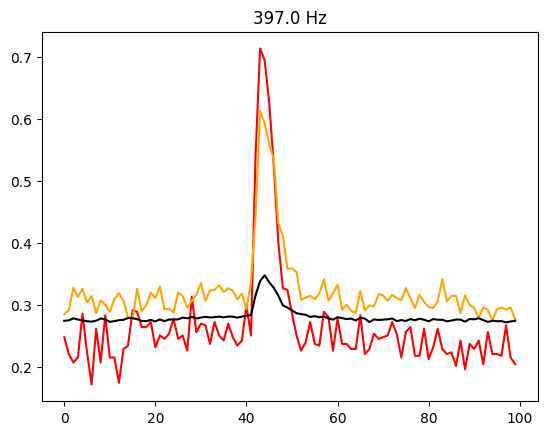

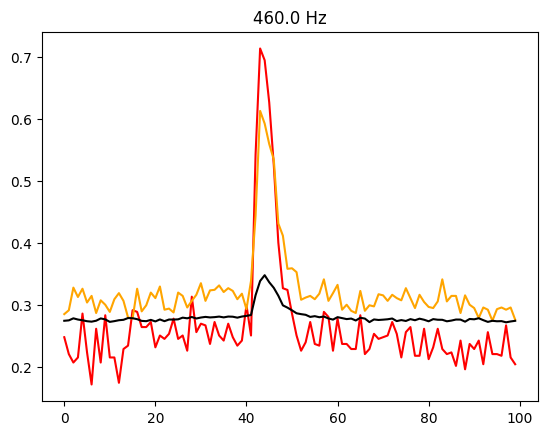

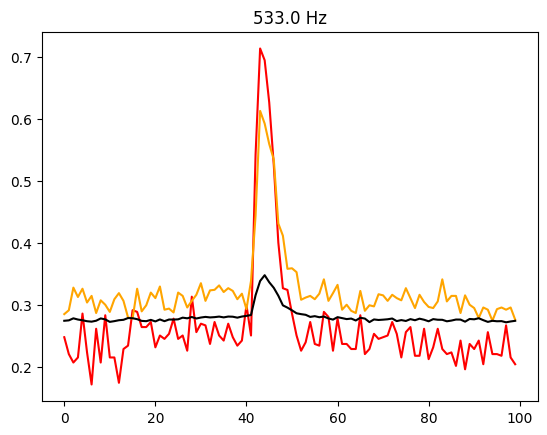

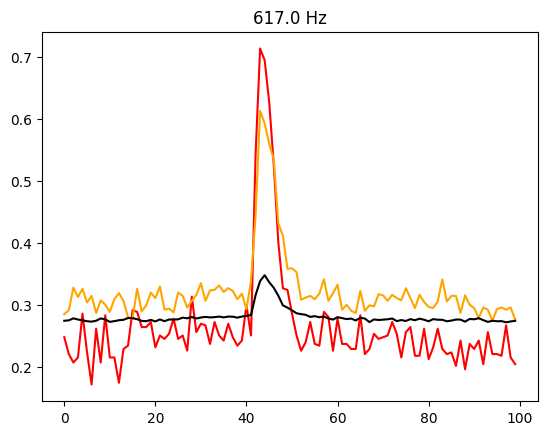

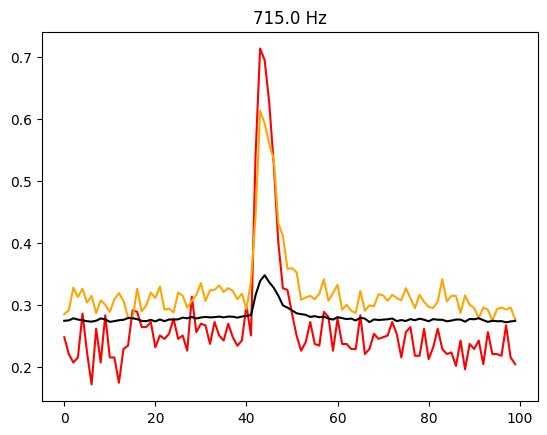

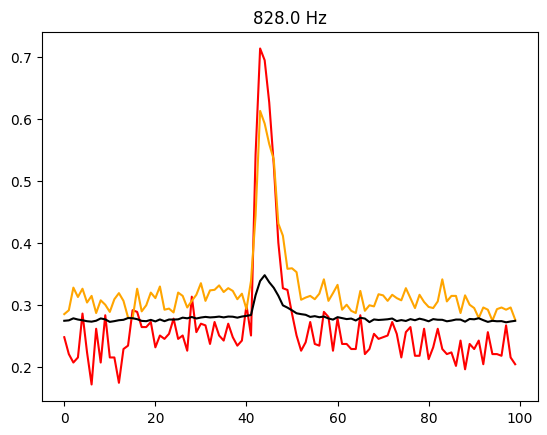

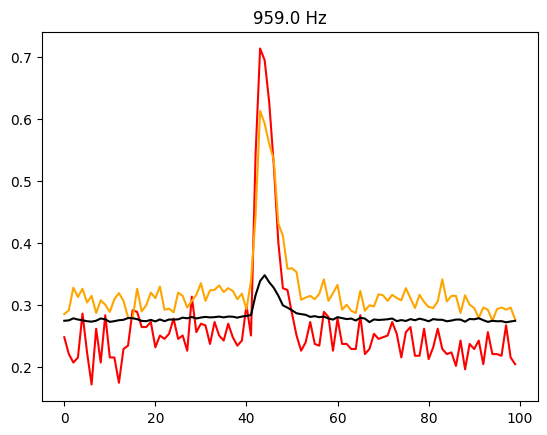

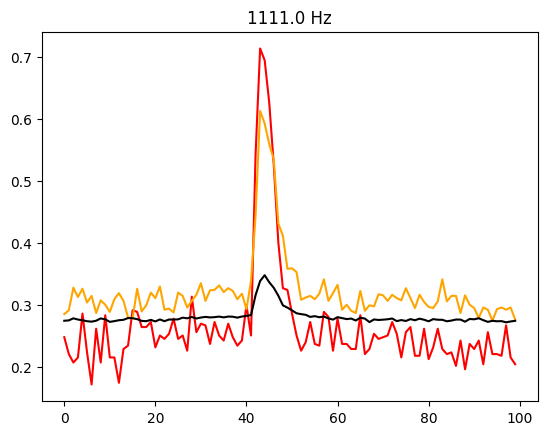

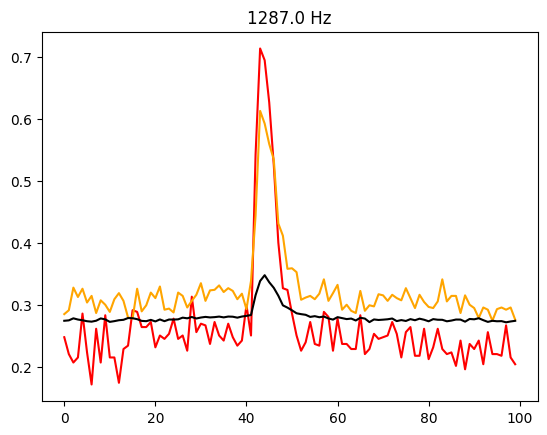

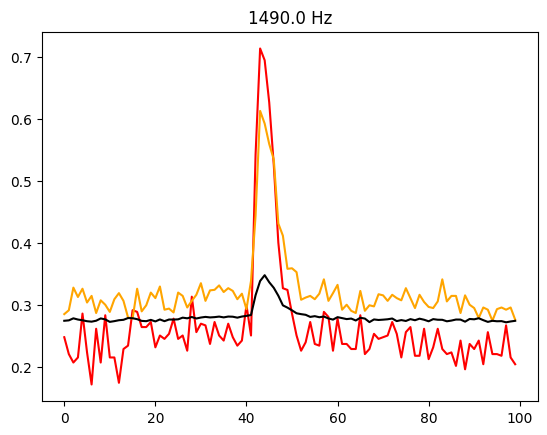

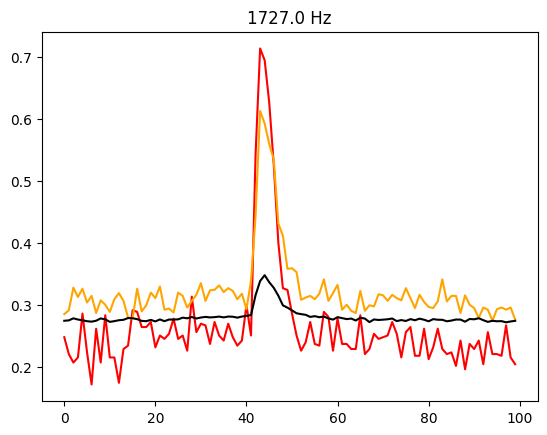

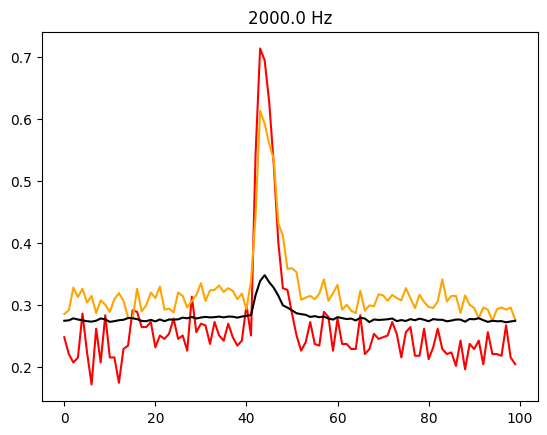

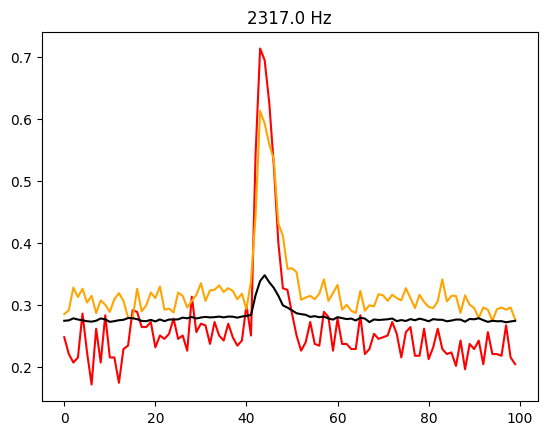

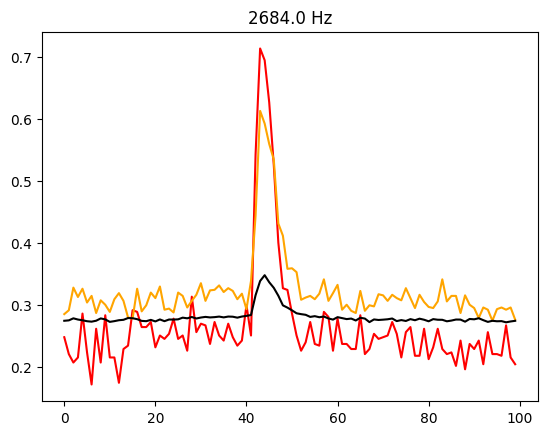

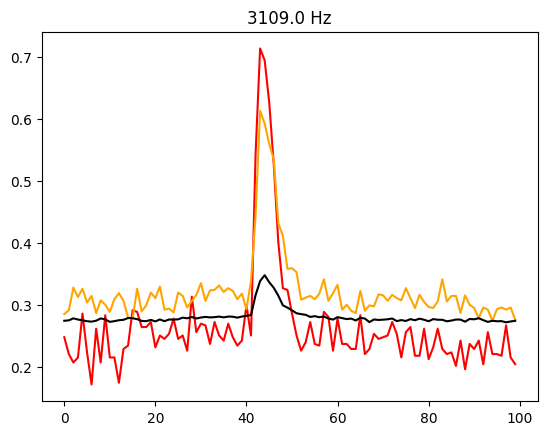

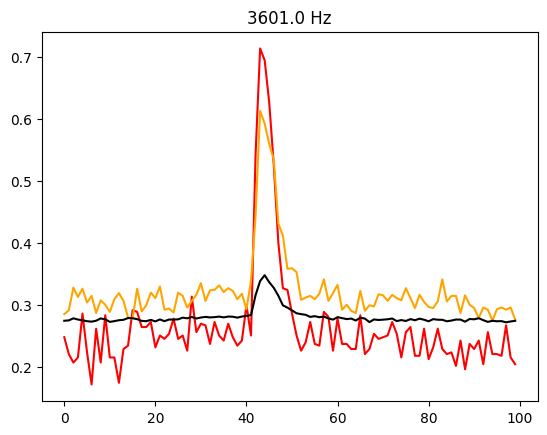

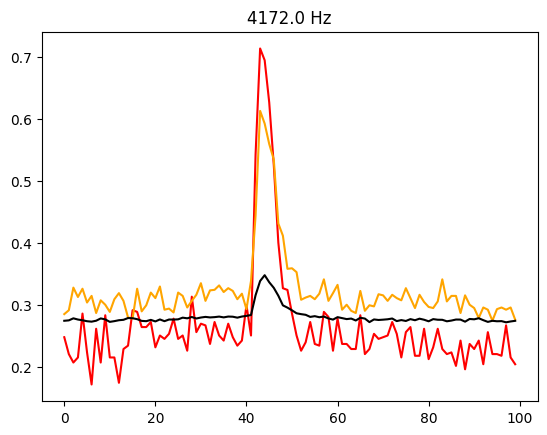

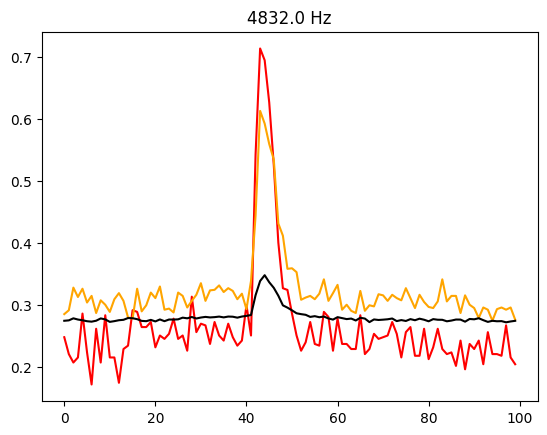

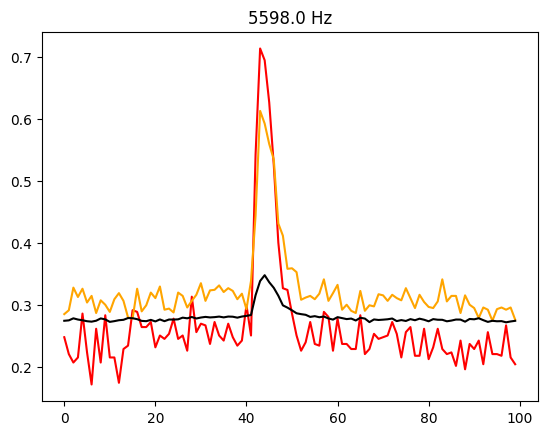

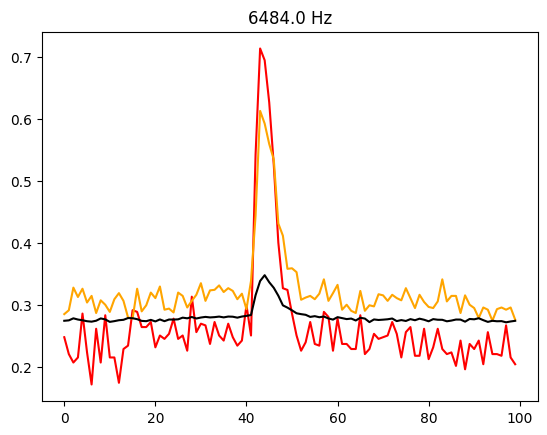

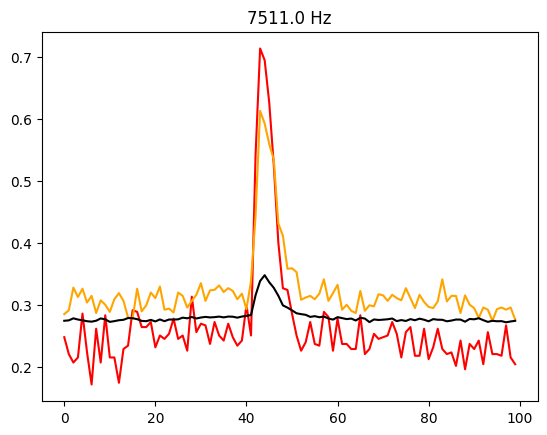

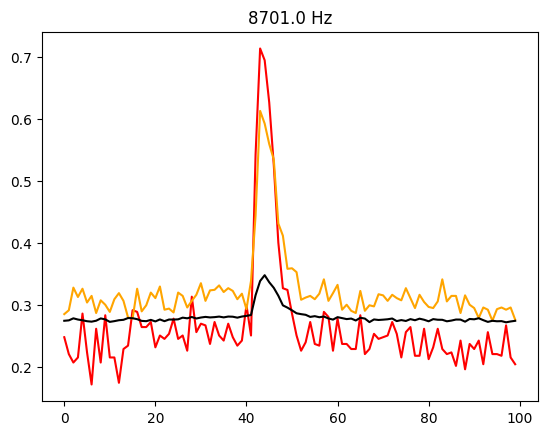

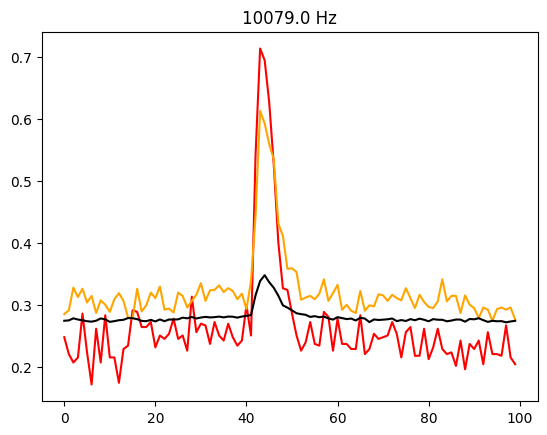

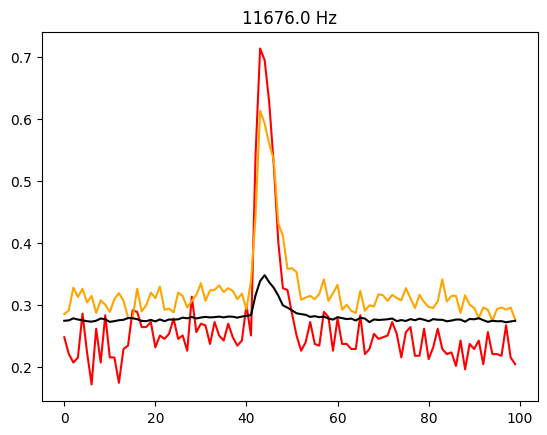

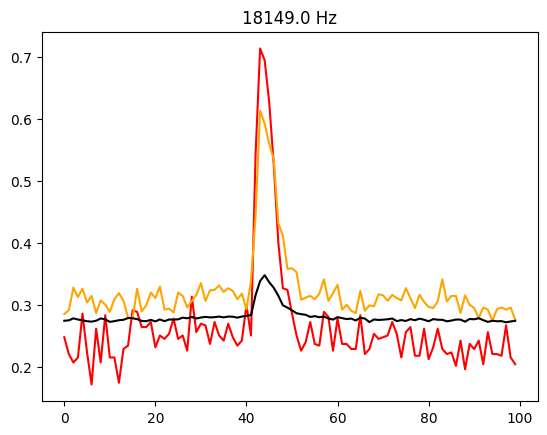

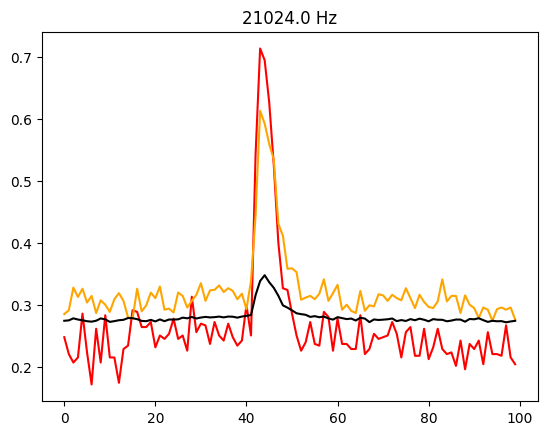

In [165]:
for tone in unique_tones : 
    #playback_sup_1 = playback_[:, (delta_f_ > 0.8) & (tones_ == tone)]   # tracking_ pour delta_frequency > 1
    #playback_inf_1 = playback_[:, (delta_f_ <= 0.8) & (tones_ == tone)]
    #playback_sup_1 = playback_[:, (delta_f_ > 0.8)]   # tracking_ pour delta_frequency > 1
    #playback_inf_1 = playback_[:, (delta_f_ <= 0.8)]  # tracking_ pour delta_frequency <= 1
    tones_sup_1 = tones_[delta_f_ > 0.5]
    tones_inf_1 = tones_[delta_f_ <= 0.5]
    playback_sup_1 = playback_[12][(delta_f_ > 3) &(tones_>=2000) & (tones_< 8000)]  # tracking_ pour delta_frequency > 1
    playback_inf_1 = playback_[12][(delta_f_ <= 3) &(tones_>=2000) & (tones_< 8000)]

    plt.plot(np.nanmean(playback_sup_1, axis = 0), c = 'red')
    plt.plot(np.nanmean(playback_inf_1, axis = 0), c = 'orange')

    #plt.plot(np.nanmean(np.nanmean(playback_sup_1, axis=1), axis = 0), c = 'red')
    #plt.plot(np.nanmean(np.nanmean(playback_inf_1, axis=1), axis = 0), c = 'orange')
    plt.plot(np.nanmean(np.nanmean(playback_, axis=1), axis = 0), c = 'black')
    plt.title(f'{tone} Hz')
    plt.show()

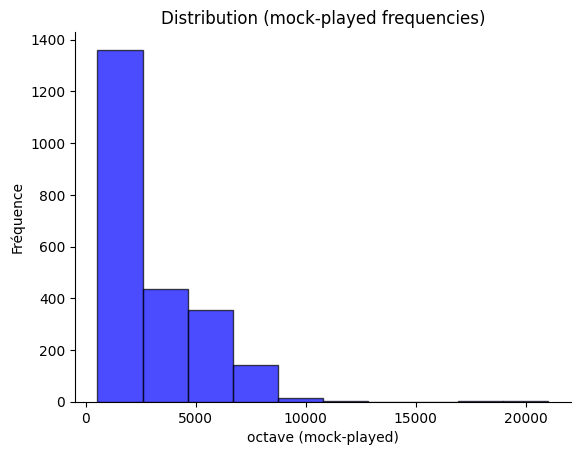

In [122]:
plot_distribution(tones_sup_1, 10)

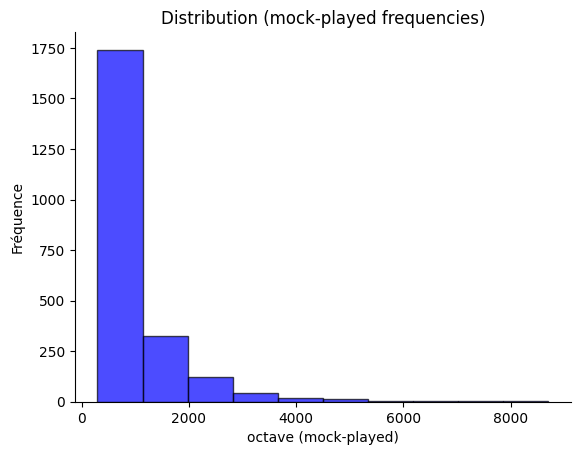

In [123]:
plot_distribution(tones_inf_1, 10)

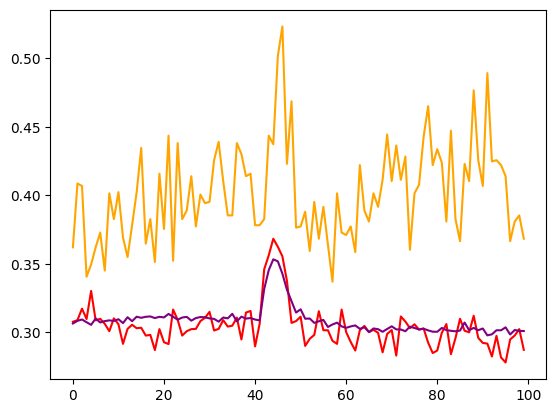

In [133]:
plt.plot(np.nanmean(np.nanmean(tracking_sup_1, axis=1), axis = 0), c = 'red')
plt.plot(np.nanmean(np.nanmean(tracking_inf_1, axis=1), axis = 0), c = 'orange')
plt.plot(np.nanmean(np.nanmean(tracking_, axis=1), axis = 0), c = 'purple')

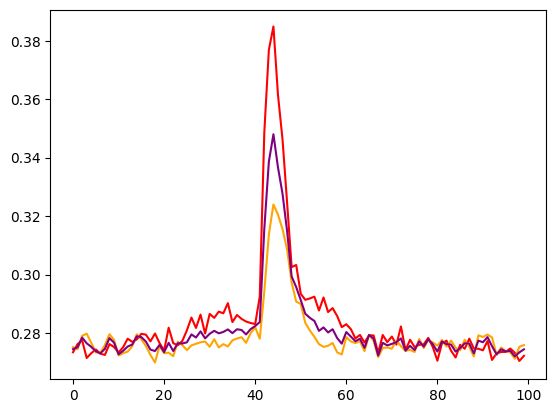

In [134]:
plt.plot(np.nanmean(np.nanmean(playback_sup_1, axis=1), axis = 0), c = 'red')
plt.plot(np.nanmean(np.nanmean(playback_inf_1, axis=1), axis = 0), c = 'orange')
plt.plot(np.nanmean(np.nanmean(playback_, axis=1), axis = 0), c = 'purple')